In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
human_data = pd.read_table('/content/drive/MyDrive/Datasets/DNA sequencing/human.txt')
chimp_data = pd.read_table('/content/drive/MyDrive/Datasets/DNA sequencing/chimpanzee.txt')
dog_data = pd.read_table('/content/drive/MyDrive/Datasets/DNA sequencing/dog.txt')


In [16]:
# human_data.head()
chimp_data.head()
# dog_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [17]:
# human_data['class'].unique()
chimp_data['class'].unique()

array([4, 6, 0, 1, 3, 2, 5])

In [18]:
human_data.groupby('class').count()

,sequence
class,
0,531
1,534
2,349
3,672
4,711
5,240
6,1343


Reasonably Balanced Data


**K-Mer Counting**
 A K-mer is a substring of length K (K > 0), and counting the occurrences of all such substrings is a central step in many analyses of DNA sequence data. Counting K-mers for a DNA sequence means finding frequencies of K-mers for the entire sequence. In bioinformatics, K-mer counting is used for genome and transcriptome assembly, metagenomic sequencing, and error correction of sequence reads. Although simple in principle, K-mer counting is a big data challenge, since a single DNA sample can contain several billion DNA sequences.

They are used to provide a unifrom size input to our model, converting those words into vectors

In [19]:
def get_k_mer(sequence, size):
  return [sequence[x : x+size].lower() for x in range (len(sequence) -size +1)]
  

In [26]:
human_data['words'] = human_data.apply(lambda x : get_k_mer(x['sequence' ],6), axis =1)
human_data.head(10)

,sequence,class,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
5,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
6,ATGAAGATTGCACACAGAGGTCCAGATGCATTCCGTTTTGAGAATG...,3,"[atgaag, tgaaga, gaagat, aagatt, agattg, gattg..."
7,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
8,ATGAAGATTGCACACAGAGGTCCAGATGCATTCCGTTTTGAGAATG...,3,"[atgaag, tgaaga, gaagat, aagatt, agattg, gattg..."
9,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."


In [27]:
chimp_data['words'] = chimp_data.apply(lambda x : get_k_mer(x['sequence' ],6), axis =1)
# chimp_data.head(10)
dog_data['words'] = dog_data.apply(lambda x : get_k_mer(x['sequence' ],6), axis =1)
dog_data.head(10)

,sequence,class,words
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."
5,ATGGAGGAGGGCTCCAGCTCGCCCGTGTCCCCCGTGGACAGCCTGG...,6,"[atggag, tggagg, ggagga, gaggag, aggagg, ggagg..."
6,ATGACGTCCACCTGCCCCAATAACACCAGGGAGAGCAACAGCAGCC...,0,"[atgacg, tgacgt, gacgtc, acgtcc, cgtcca, gtcca..."
7,ATGGCCAACTCCACAGGGCTGACCACCTCGGAAGTCGTGGGCTCGG...,0,"[atggcc, tggcca, ggccaa, gccaac, ccaact, caact..."
8,ATGGCGAACTATAGCCATGCAGCTGACAACATTTTACAAAATCTTT...,0,"[atggcg, tggcga, ggcgaa, gcgaac, cgaact, gaact..."
9,ATGACCACTCCTCACAATCAAGCTCAACCTGGCCCTTCCAACAATT...,0,"[atgacc, tgacca, gaccac, accact, ccactc, cactc..."


In [29]:
human_data2 = human_data.drop('sequence', axis =1)
human_data2.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [ ]:
human_words = list(human_data2.words)
human_words

In [31]:
len(human_words)

4380

In [33]:
for item in range(len(human_words)):
  human_words[item] = ' '.join(human_words[item])
human_words[0]

'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaa

In [34]:
human_data2.shape

(4380, 2)

In [40]:
y_data = human_data2.iloc[:,0].values
y_data.shape

(4380,)

Using bad of words using CountVectorizer

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X= cv.fit_transform(human_words)


In [51]:
print( X.shape)

(4380, 232414)


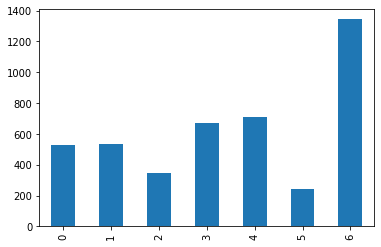

In [65]:
human_data2['class'].value_counts().sort_index().plot.bar()

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_data, test_size = 0.20, random_state = 42)

In [70]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [73]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB( alpha = 0.1)
classifier.fit( X_train, Y_train)


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [74]:
y_pred = classifier.predict(X_test)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       1.00      0.98      0.99       106
           2       1.00      1.00      1.00        78
           3       0.99      0.99      0.99       125
           4       0.99      0.96      0.98       149
           5       1.00      1.00      1.00        51
           6       0.96      0.99      0.98       265

    accuracy                           0.98       876
   macro avg       0.99      0.99      0.99       876
weighted avg       0.98      0.98      0.98       876



In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 99,   0,   0,   0,   1,   0,   2],
       [  0, 104,   0,   0,   0,   0,   2],
       [  0,   0,  78,   0,   0,   0,   0],
       [  0,   0,   0, 124,   0,   0,   1],
       [  1,   0,   0,   0, 143,   0,   5],
       [  0,   0,   0,   0,   0,  51,   0],
       [  1,   0,   0,   1,   0,   0, 263]])

In [84]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
print('Accuracy = ', accuracy_score(Y_test, y_pred))
print("Precision = ",precision_score(Y_test, y_pred, average='weighted'))
print('F1 Score =', f1_score(Y_test, y_pred, average='weighted'))

Accuracy =  0.9840182648401826
Precision =  0.984290543482443
F1 Score = 0.9840270014702487
